<a href="https://colab.research.google.com/github/CurtisTelvanni/Live-American-Sign-Language-Recognition-EEE-312-Project/blob/main/ASL_recognition_train_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some essential libraries for the code are imported and installed.

In [1]:
# import dependencies
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from tensorflow.keras import datasets, layers, models
from scipy.io import loadmat
from scipy.io import savemat
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as keras
import h5py
import uuid
import os
import cv2
import PIL
import io
import html
import time

# Sign in to your google account and provide access

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Loading database

In [3]:
downloaded = drive.CreateFile({'id':'1c1bxVDvrfgsc8_eCi-fyKn2uazsgTLn_'})
downloaded.GetContentFile('data_master_6.mat') 
downloaded = drive.CreateFile({'id':'1uo9NSbGx83ZhU9GMz4L1uv1dALROsgqX'})
downloaded.GetContentFile('labels_6_oh.mat') 

# Reading data

In [4]:
data_temp = {}
f = h5py.File('data_master_6.mat')
for k, v in f.items():
    data_temp[k] = np.array(v)

labels_temp = {}
f = h5py.File('labels_6_oh.mat')
for k, v in f.items():
    labels_temp[k] = np.array(v)
 
data = data_temp["data"]
labels = labels_temp["labels_oh"]


data = np.transpose(data)
labels = np.transpose(labels)

data = data/255
 
print(data.shape)
print(labels.shape)

(14820, 100, 100, 3)
(14820, 1)


# Some visualization

[1.]


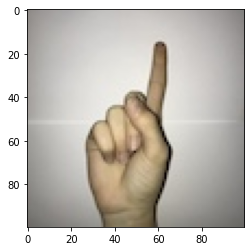

In [5]:
#visualization
index = 500;

plt.imshow(data[index,:,:,:])

print(labels[index])


# Shuffle the data before splitting train, test, validation sets

In [6]:
#shuffling the data
np.random.seed(0)
np.random.shuffle(data)
np.random.seed(0)
np.random.shuffle(labels)

data = data[0:13000,:,:,:]
labels = labels[0:13000,:]

In [7]:
lim = data.shape[0];
#split in training and test sets 
train_in = np.array(data[0:round(lim*0.8),:,:])
train_out = labels[0:round(lim*0.8),:]
test_in = np.array(data[round(lim*0.8):round(lim*0.9),:,:])
test_out = labels[round(lim*0.8):round(lim*0.9),:]
val_in = np.array(data[round(lim*0.9):lim-1,:,:])
val_out = labels[round(lim*0.9):lim-1,:]


print(train_in.shape)
print(train_out.shape)
print(test_in.shape)
print(test_out.shape)
print(val_in.shape)
print(val_out.shape)


(10400, 100, 100, 3)
(10400, 1)
(1300, 100, 100, 3)
(1300, 1)
(1299, 100, 100, 3)
(1299, 1)


# Some more visualization

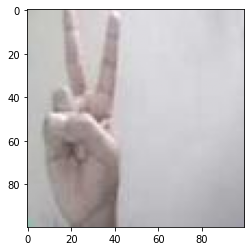

In [8]:
#visualization
index = 600;

plt.imshow(train_in[index])
#plt.imshow(train_in_o[index].reshape(100,100))

#print(train_in[index].reshape(100,100))
#print(train_out[index])

# Defining and Visualizing the model

In [9]:
model = tf.keras.models.Sequential()

#model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten(input_shape = [100, 100]))
#model.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(264, activation = tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(39, activation = tf.nn.softmax))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

# Training and Evaluation

In [10]:
#model.fit(train_in,train_out, epochs = 7)
model.fit(train_in,train_out, epochs = 7, validation_data = (val_in, val_out), verbose=1)
model.evaluate(test_in,test_out)

Epoch 1/7
325/325 [==============================] - 170s 519ms/step - loss: 2.2157 - accuracy: 0.4399 - val_loss: 0.9797 - val_accuracy: 0.7860
Epoch 2/7
325/325 [==============================] - 168s 517ms/step - loss: 0.5434 - accuracy: 0.8947 - val_loss: 0.3627 - val_accuracy: 0.9176
Epoch 3/7
325/325 [==============================] - 168s 516ms/step - loss: 0.2013 - accuracy: 0.9703 - val_loss: 0.1865 - val_accuracy: 0.9646
Epoch 4/7
325/325 [==============================] - 167s 514ms/step - loss: 0.0825 - accuracy: 0.9929 - val_loss: 0.1049 - val_accuracy: 0.9792
Epoch 5/7
325/325 [==============================] - 168s 516ms/step - loss: 0.0394 - accuracy: 0.9981 - val_loss: 0.0789 - val_accuracy: 0.9838
Epoch 6/7
325/325 [==============================] - 168s 515ms/step - loss: 0.0193 - accuracy: 0.9995 - val_loss: 0.0557 - val_accuracy: 0.9915
Epoch 7/7
41/41 [==============================] - 5s 129ms/step - loss: 0.0692 - accuracy: 0.9831


[0.06918662786483765, 0.9830769300460815]

# Final visualization

In [11]:
#calculated_out = (model.predict(test_in))
#print(calculated_out.shape)

In [12]:
#calculated_out = np.where(calculated_out > 0.5, 1, 0)
#visualization
#index = 10;

#plt.imshow(test_in[index])

#test_label = test_out[index,:]
#pred_label = calculated_out[index,:]

#print(test_label)
#print(pred_label)

#print("actual label" + str(np.where(test_label == 1)[0] + 1))
#print("predicted label" + str(np.where(pred_label == 1)[0] + 1))

# Saving the model

In [13]:
model.save_weights('model_final_2')